# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Required imports

## Generating single value from normal distribution with given mean and variance

In [2]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(14.7255)


## Sampling from categorical probabilities with given probabilities

In [3]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(0)


## Animating data

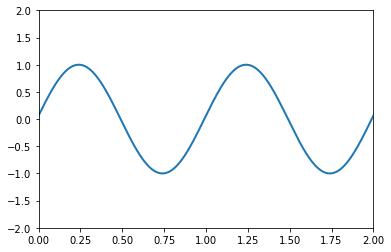

In [4]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

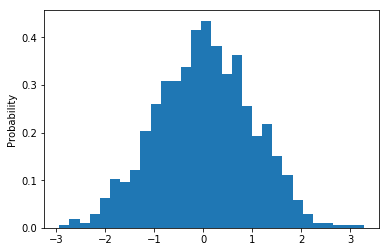

In [5]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

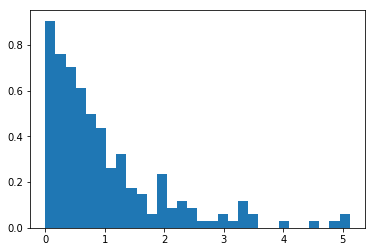

In [6]:
def get_sample():
    return pyro.sample("task1_sample", pyro.distributions.Exponential(1))

def animate():
    data = []
    
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    def anim_hist(i):
        data.append(get_sample())
        ax.clear()
        ax.hist(data, density=True, bins=30)

    anim = animation.FuncAnimation(fig, anim_hist, frames=200, interval=20)
    return HTML(anim.to_jshtml())

animate()

## Task 2

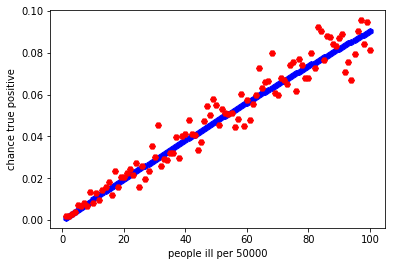

In [11]:
## Insert solution here

population = 50000
false_positive_chance = 0.02
false_negative_chance = 0.01
ill_chance_param_range = range(1,101)


def bayes(ill_chance):
    true_positive_chance = 1 - false_negative_chance
    not_ill_chance = 1 - ill_chance
    ill_chance = true_positive_chance*ill_chance
    positive_chance = ill_chance + false_positive_chance*not_ill_chance
    return ill_chance/positive_chance


def sample_is_ill(ill_chance):    
    return pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([1 - ill_chance, ill_chance])))

def sample_test_result(chance):
    return pyro.sample("categorical_sampling", pyro.distributions.Categorical(probs = torch.tensor([1 - chance, chance])))
    
def simulate(ill_chance):
    not_ill_test_positive = 0
    not_ill_test_negative = 0
    ill_test_positive = 0
    ill_test_negative = 0
    for person in range(0, population):
        is_ill = sample_is_ill(ill_chance)

        if is_ill:
            result = sample_test_result(false_negative_chance)
            if result:
                ill_test_negative += 1
            else:
                ill_test_positive += 1
        else:
            result = sample_test_result(false_positive_chance)
            if result:
                not_ill_test_positive += 1
            else:
                not_ill_test_negative += 1
    
    return ill_test_positive / (ill_test_positive + not_ill_test_positive)


def compare():
    from_bayes = []
    from_experiment = []
    for i in range(1, 101):
        ill_chance = i / population
        from_bayes.append(bayes(ill_chance))
        from_experiment.append(simulate(ill_chance))
    
    plt.plot(range(1, 101), from_bayes, "bh", label = "from bayes")
    plt.plot(range(1, 101), from_experiment, "rH", label = "from experiment")
    plt.xlabel("people ill per 50000")
    plt.ylabel("chance true positive")
    plt.show()
        
compare()
